# MEG Analysis Serial Dependence 

In [1]:
import os
import numpy as np
import mne
import re
#import matplotlib.pyplot as plt

%matplotlib qt

# Load Data

First create a dictionary that maps folders to trials

In [2]:
home = '../../../../MEG_raw01/'
home_folders = os.listdir(home)
home_folders = [os.path.join(home, entry) for entry in home_folders if re.findall(r"^\w+", entry)]
folder_dict = {}
for folder in home_folders:
    entries = os.listdir(folder)
    folder_dict[folder] = [os.path.join(folder, entry) for entry in entries if re.findall(r"^\w+SD_\w*raw.fif", entry)]

In [3]:
ch_exclude = ['MEG2631','MEG2632','MEG2633','MEG2641','MEG2642','MEG2643','MEG2914','MEG2915','MEG2916','MEG2924','MEG2925',
'MEG2926','MEG2934','MEG2935','MEG2936','MEG2944','MEG2945','MEG2946','MEG3014','MEG3015','MEG3016','MEG3024','MEG3025',
'MEG3026','MEG3034','MEG3035','MEG3036','MEG3044','MEG3045','MEG3046','MEG3114','MEG3115','MEG3116','MEG3124','MEG3125',
'MEG3126','MEG3134','MEG3135','MEG3136','MEG3144','MEG3145','MEG3146','MEG3214','MEG3215','MEG3216','MEG3224','MEG3225',
'MEG3226','MEG3234','MEG3235','MEG3236','MEG3244','MEG3245','MEG3246']

In [22]:
data_path = folder_dict['../../../../MEG_raw01/170808_yasumura_SD'][2]
print(data_path)
raw = mne.io.read_raw_fif(data_path)

original = raw.copy()
raw.load_data().filter(l_freq=2.5, h_freq=50)
raw.pick_types(meg='grad', stim=True)

#print(raw.info)

../../../../MEG_raw01/170808_yasumura_SD/20170808_1418_SD_raw.fif
Opening raw data file ../../../../MEG_raw01/170808_yasumura_SD/20170808_1418_SD_raw.fif...
    Read a total of 10 projection items:
        grad_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v2 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v3 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v4 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v5 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v2 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v3 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v4 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v5 (1 x 360)  idle
    Range : 9000 ... 589999 =      9.000 ...   589.999 secs
Ready.
Reading 0 ... 580999  =      0.000 ...   580.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass

<Raw | 20170808_1418_SD_raw.fif, 243 x 581000 (581.0 s), ~1.06 GB, data loaded>

In [35]:
raw.info

<Info | 24 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: MEG0112, MEG0113, MEG0122, MEG0123, MEG0132, MEG0133, MEG0142, ...
 chs: 240 GRAD, 3 STIM
 custom_ref_applied: False
 description: 360 System
 dev_head_t: MEG device -> head transform
 dig: 464 items (3 Cardinal, 5 HPI, 456 Extra)
 events: 1 item (list)
 experimenter: neuromag (neuromag)
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 2.5 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 60.0
 lowpass: 50.0 Hz
 meas_date: 2017-08-08 02:08:28 UTC
 meas_id: 4 items (dict)
 nchan: 243
 proj_id: 1 item (ndarray)
 proj_name: nict_amano
 projs: grad_68_noIAS_20140702-2.fif : PCA-v1: off, ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

# ICA Analysis

In [18]:
ica = mne.preprocessing.ICA(n_components=80, max_iter=1600)
ica.fit(raw)

Fitting ICA to data using 240 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


KeyboardInterrupt: 

Reject eye movements, noisy signals

In [36]:
ica.exclude = [0, 1]
ica.plot_properties(raw, picks = ica.exclude)
ica.plot_components()
raw.load_data()
ica.apply(raw)

RuntimeError: No fit available. Please fit ICA.

# Epoch Data

Event IDs

In [24]:
#print(raw.ch_names)
chan_idxs = [raw.ch_names.index(ch) for ch in raw.ch_names]
events = mne.find_events(raw, stim_channel='STI015')
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax = 1.5)
epochs.plot_image(picks = ['MEG0422'])

101 events found
Event IDs: [5]
Not setting metadata
Not setting metadata
101 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 5)
10 projection items activated
Loading data for 101 events and 1701 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 640x480 with 4 Axes>]

In [36]:
chan = raw.get_data(picks='STI015')
chan = chan.squeeze()
stim_count = 0
print(np.unique(chan))
for i in range(0, len(chan)-2):
    if chan[i] == 0. and chan[i+1] == 5. and chan[i+2] == 5.:
        stim_count += 1
    elif chan[i] == 0. and chan[i+1] == 5. and chan[i+2] == 0.:
        print(stim_count)



[0. 5.]
48


Dropped 1 epoch: 48
Loading data for 30 events and 1701 original time points ...
Loading data for 20 events and 1701 original time points ...


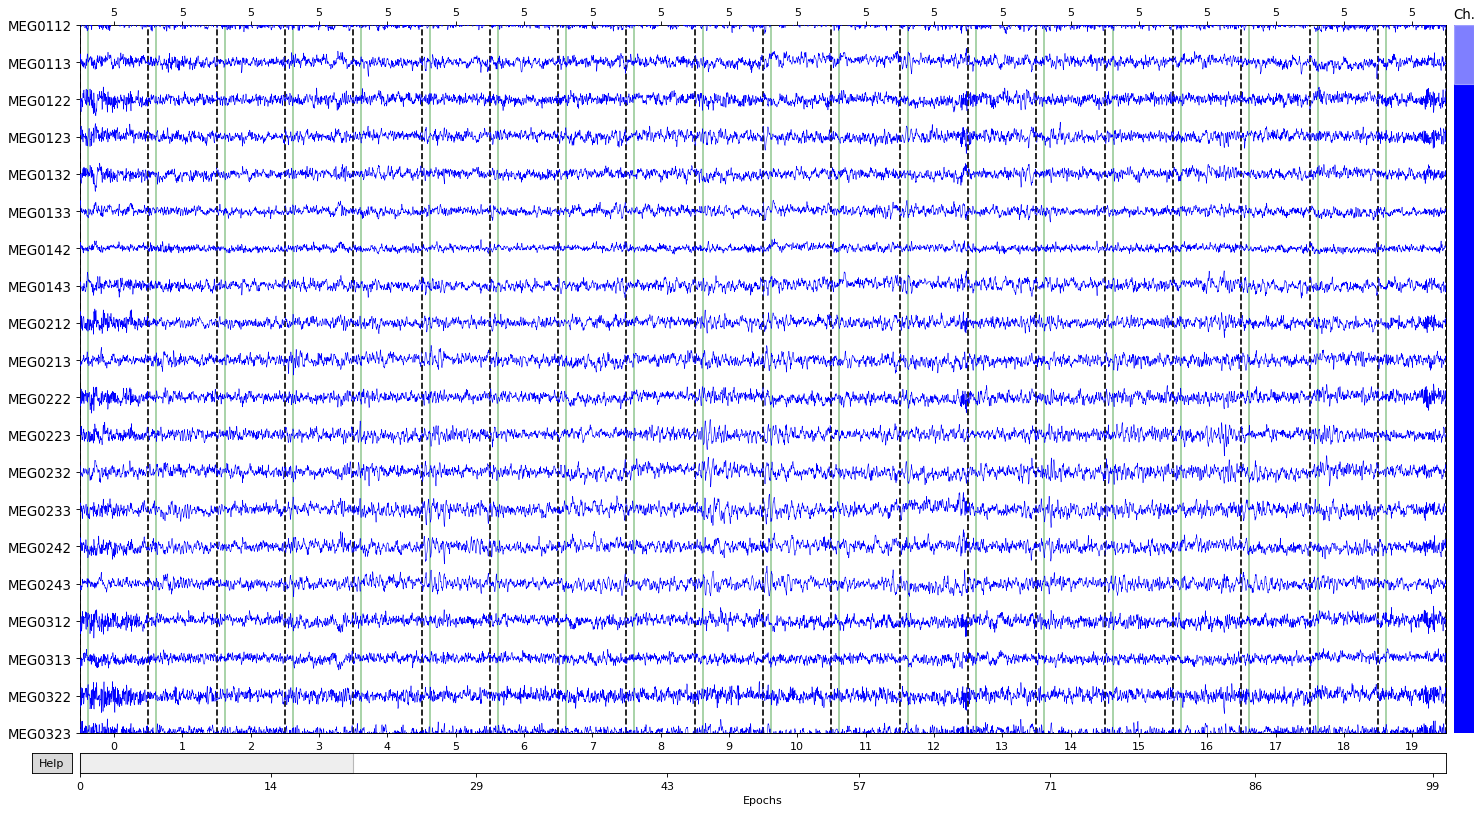

In [12]:

epochs.drop(indices=48)
#bad = 48?
epochs.plot()

In [13]:
epochs.events

array([[ 11732,      0,      5],
       [ 17678,      0,      5],
       [ 23691,      0,      5],
       [ 28018,      0,      5],
       [ 32227,      0,      5],
       [ 36536,      0,      5],
       [ 41547,      0,      5],
       [ 45840,      0,      5],
       [ 52288,      0,      5],
       [ 59554,      0,      5],
       [ 66285,      0,      5],
       [ 70578,      0,      5],
       [ 75672,      0,      5],
       [ 79948,      0,      5],
       [ 86930,      0,      5],
       [ 93344,      0,      5],
       [100159,      0,      5],
       [104452,      0,      5],
       [109497,      0,      5],
       [113773,      0,      5],
       [119686,      0,      5],
       [123962,      0,      5],
       [131695,      0,      5],
       [135988,      0,      5],
       [143254,      0,      5],
       [147263,      0,      5],
       [154646,      0,      5],
       [158939,      0,      5],
       [164367,      0,      5],
       [168643,      0,      5],
       [17

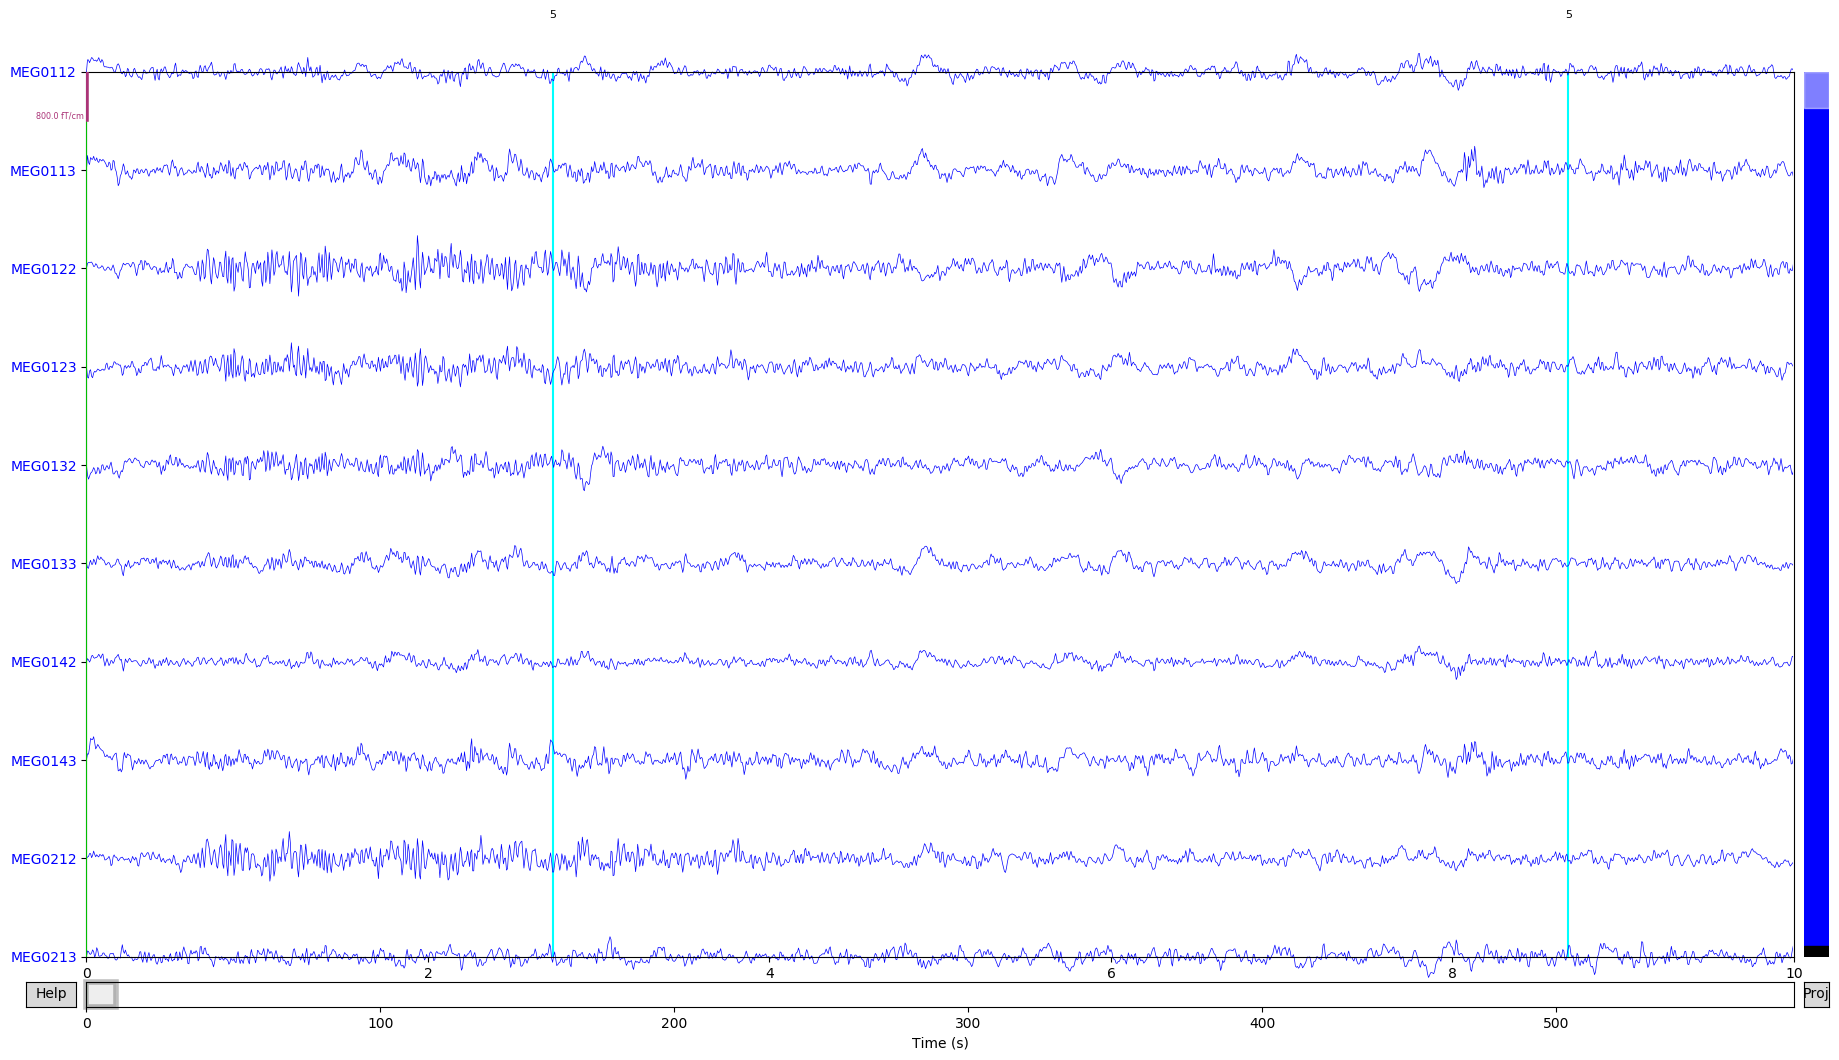

In [14]:
raw.plot(events=events, n_channels=10, duration=10)

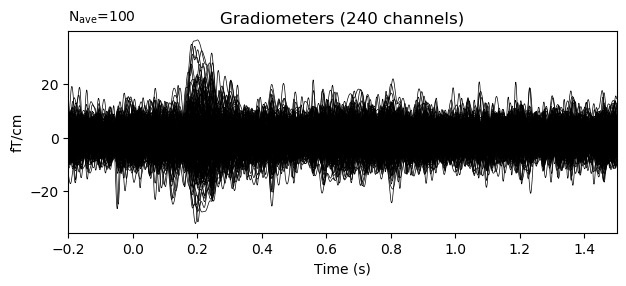

In [22]:
evoked = epochs.average()
evoked.plot()

Loading data for 100 events and 1701 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 100 events and 1701 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


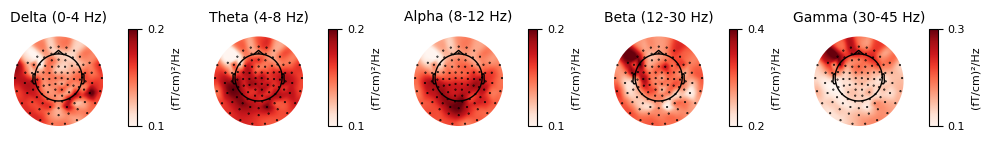

In [23]:
epochs.plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False, picks=["MEG0422"])
epochs.plot_psd_topomap(ch_type='grad', normalize=True)

# Time Frequency Analysis

In [ ]:
freqs = np.logspace(*np.log10([2, 35]), num=8)
n_cycles = freqs / 2.
power , itc = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)

In [ ]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#power.plot([82], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[82])

#fig, axis = plt.subplots(1, 2, figsize=(7,4))
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12, 
                   baseline=(-0.5, 0), mode='logratio', 
                  title='Alpha', show=False)
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12, 
                   baseline=(-0.5, 0), mode='logratio',
                  title='Beta', show=False)


# Trial separation

In [ ]:
from scipy.io import loadmat

In [ ]:
data = loadmat("../MEG/Behaviour/06oishi0131/oishi0131_session_20170131T134216_block1_data.mat")

In [ ]:
timeResponse = data['GabOrSpec']
Response = np.reshape(Response, (100,))
Target = data['TargetGabor'][0]
Cond = data['CouplesOrder']
RespTime = data['TimeArray']

In [ ]:
Error = Response - Target

In [ ]:
trialGaborDiff = np.hstack((np.array([0]),(Target[1:]-Target[:-1])))

In [ ]:
def fixOrientation(arr):
    for i in range(len(arr)):
        if arr[i] > 90:
            arr[i] -= 180
        elif arr[i] < -90:
            arr[i] += 180
    return arr

In [ ]:
Error = np.nan_to_num(Error)

In [ ]:
data_epoch = loadmat('../MEG_icareject/170807_hashizume_SD_data_tsss_ica_reject.mat')

In [ ]:
data_epoch['data_all_clean_ica']